<a href="https://colab.research.google.com/github/KaterinaPenaloza/Tareas-Datascience/blob/main/ProyectoRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Redes



# Presentación dataset

Para el proyecto de análisis de redes, elegi el dataset llamado **"moreno_zebra network"**, el cual consiste en una red no dirigida que representa la interacción entre 27 cebras de Grévy en Kenya. Cada nodo representa una cebra y una arista representa que hubo interacción entre dos cebras durante el estudio.

Las columnas del dataset son:
* 1°: ID Nodo origen
* 2°: ID Nodo objetivo

Nosotros renombraremos estas columnas como "Source Zebra" y "Target Zebra" para mayor entendimiento.


# Librerías

In [ ]:
!pip install networkx
!pip install scipy matplotlib

In [ ]:
# Análisis de los datos
import pandas as pandas
import numpy as numpy
from scipy.stats import spearmanr   #Calcular coeficiente de Spearman

# Manipulación de grafos
import networkx as nx

# Formatear la salida en formato json para que sea más legible
import json

# Utilizado para las gráficas
import seaborn as sns

# Mostrar gráficas del análisis de datos
import matplotlib.pyplot as plt
from matplotlib import style

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "64"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['figure.figsize'] = 10, 6.25
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Pre-procesamiento

In [ ]:
# Subir archivo
from google.colab import files
uploaded = files.upload()

# Leer el archivo, usando como dlimitación los espacios " ", nos saltamos las primeras dos filas que no sabemos como interpretarlas,
# por lo tanto las consideraremos irrelevantes, cambiamos los nombres de las columnas por Source Zebra y Target Zebra respectivamente.
df = pandas.read_csv('/content/zebra.txt', delimiter=' ',  skiprows=2,  header=None, names=['Source Zebra', 'Target Zebra'])
df

Saving zebra.txt to zebra (1).txt


,Source Zebra,Target Zebra
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
106,24,26
107,24,27
108,25,26
109,25,27


## Limpieza de dataset

Este paso es para asegurarnos de que los datos estén óptimos para su procesamiento más adelante, en primer lugar eliminamos los nodos duplicados, luego eliminamos los datos con valores nulos o NaN, y finalmente nos aseguramos de que el tipo de dato sea el correcto (int).

In [ ]:
# Eliminar nodos duplicados
df.drop_duplicates(subset=['Source Zebra', 'Target Zebra'], keep='first', inplace=True)
df.drop_duplicates(subset=['Target Zebra', 'Source Zebra'], keep='first', inplace=True)

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Transformar columnas a int
df = df.astype(int)

df

,Source Zebra,Target Zebra
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
106,24,26
107,24,27
108,25,26
109,25,27


# Análisis descriptivo de la red


## Medidas de centralidad

In [ ]:
# Crear un grafo desde el DataFrame
G = nx.from_pandas_edgelist(df, 'Source Zebra', 'Target Zebra')

# Calcular medidas de grado
degree = dict(G.degree())

# Calcular medida de cercanía (closeness)
closeness = nx.closeness_centrality(G)

# Calcular medida de intermediación (betweenness)
betweenness = nx.betweenness_centrality(G)

# Calcular PageRank
pagerank = nx.pagerank(G)

# Crear un DataFrame para almacenar las medidas
medidas_df = pandas.DataFrame({
    'Nodo': list(degree.keys()),
    'Grado': list(degree.values()),
    'Cercanía': list(closeness.values()),
    'Intermediación': list(betweenness.values()),
    'PageRank': list(pagerank.values())
})
medidas_df

,Nodo,Grado,Cercanía,Intermediación,PageRank
0,1,13,0.531868,0.024031,0.045369
1,2,13,0.531868,0.003133,0.044276
2,3,13,0.531868,0.003133,0.044276
3,4,13,0.489879,0.017254,0.044985
4,5,3,0.351234,0.000000,0.014430
5,6,12,0.517094,0.001589,0.041136
6,7,12,0.517094,0.002877,0.041281
7,8,13,0.531868,0.024031,0.045369
8,9,13,0.531868,0.003133,0.044276
9,10,13,0.600496,0.101441,0.046647


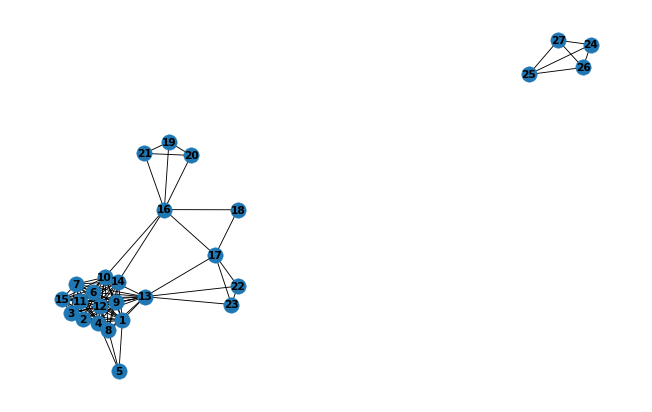

In [ ]:
# Visualización del grafo
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

Interpretaciones generales:

1. **Grado:**
   - Los nodos (cebras) 1, 2, 3, 4, 8, 9, 10, 11, y 12 tienen un grado alto, lo que indica que están conectados con muchos otros nodos (cebras).
   - Los nodos 5, 18, 19, 20, 21, 22, 23, 24, 25, 26 y 27 tienen un grado mucho menor, lo que indica que están menos conectados en comparación con las otras cebras, incluso se puede apreciar en el grafo que las cebras 24, 25, 26 y 27 están aisladas del resto de cebras.

2. **Cercanía:**
   - Los nodos 10 y 13 tienen una cercanía relativamente alta, lo que sugiere que están cerca de muchos otros nodos en términos de distancia geodésica.
   - Los nodos 24, 25, 26 y 27 tienen una cercanía más baja, indicando que efectivamente como se puede ver en el grafo, están más alejados de los otros nodos en términos de distancia geodésica.

3. **Intermediación:**
   - El nodo 16 y 13 tienen intermediación alta, lo que nos dice que actúa como un puente entre muchos pares de nodos.
   - Los nodos 5, 18, 19, 20, 21, 22, 23, 24, 25, 26 y 27 tienen una intermediación cero, lo que indica que no están en la ruta más corta entre otros nodos.

4. **PageRank:**
   - El nodo 13 tienen el PageRank más alto, sugiriendo que es el más importante según el algoritmo PageRank.
   - El nodo 5 tiene el PageRank más bajo, por lo que sería el nodo menos importante según este algoritmo.


# Análisis correlacional de la red

## Dispersión de influencia

In [ ]:
# Función para calcular la dispersión de influencia
def calcular_dispersion(grafo, medida_centralidad, top=10):
    # Obtener el top nodos más centrales según la medida de centralidad
    nodos_top = sorted(medida_centralidad, key=medida_centralidad.get, reverse=True)[:top]
    json_dispersion = {}  # Crear un diccionario para almacenar los resultados

    # Calcular la dispersión de influencia para cada nodo top 10
    for nodo in nodos_top:
        subgrafo_ego = nx.ego_graph(grafo, nodo)
        dispersion = nx.average_neighbor_degree(subgrafo_ego)
        json_dispersion["Nodo: " + str(nodo)] = {str(vecino): valor_dispersion for vecino, valor_dispersion in dispersion.items()}

    # Devolver resultado en formato JSON para mayor legibilidad
    print(json.dumps(json_dispersion, indent=2))


In [ ]:
# Dispersión de influencia para el grado
print("Dispersión de influencia para el grado:")
calcular_dispersion(G, degree)


Dispersión de influencia para el grado:
{
  "Nodo: 13": {
    "1": 11.1,
    "2": 10.909090909090908,
    "3": 10.909090909090908,
    "6": 10.909090909090908,
    "7": 11.1,
    "8": 11.1,
    "9": 10.909090909090908,
    "10": 10.909090909090908,
    "11": 10.909090909090908,
    "12": 10.909090909090908,
    "13": 9.0,
    "15": 11.1,
    "17": 6.666666666666667,
    "22": 6.666666666666667,
    "23": 6.666666666666667
  },
  "Nodo: 1": {
    "1": 10.692307692307692,
    "2": 11.416666666666666,
    "3": 11.416666666666666,
    "4": 10.833333333333334,
    "5": 12.333333333333334,
    "6": 11.727272727272727,
    "7": 11.454545454545455,
    "8": 10.75,
    "9": 11.416666666666666,
    "10": 11.727272727272727,
    "11": 11.416666666666666,
    "12": 11.416666666666666,
    "13": 11.8,
    "14": 12.0
  },
  "Nodo: 2": {
    "1": 12.166666666666666,
    "2": 12.076923076923077,
    "3": 12.076923076923077,
    "4": 12.25,
    "6": 12.333333333333334,
    "7": 12.166666666666666,
    

In [ ]:
# Dispersión de influencia para la cercanía
print("Dispersión de influencia para la cercanía:")
calcular_dispersion(G, closeness)


Dispersión de influencia para la cercanía:
{
  "Nodo: 10": {
    "1": 11.727272727272727,
    "2": 11.583333333333334,
    "3": 11.583333333333334,
    "4": 11.727272727272727,
    "6": 11.583333333333334,
    "7": 11.727272727272727,
    "8": 11.727272727272727,
    "9": 11.583333333333334,
    "10": 10.692307692307692,
    "11": 11.583333333333334,
    "12": 11.583333333333334,
    "13": 11.727272727272727,
    "15": 11.727272727272727,
    "16": 13.0
  },
  "Nodo: 13": {
    "1": 11.1,
    "2": 10.909090909090908,
    "3": 10.909090909090908,
    "6": 10.909090909090908,
    "7": 11.1,
    "8": 11.1,
    "9": 10.909090909090908,
    "10": 10.909090909090908,
    "11": 10.909090909090908,
    "12": 10.909090909090908,
    "13": 9.0,
    "15": 11.1,
    "17": 6.666666666666667,
    "22": 6.666666666666667,
    "23": 6.666666666666667
  },
  "Nodo: 1": {
    "1": 10.692307692307692,
    "2": 11.416666666666666,
    "3": 11.416666666666666,
    "4": 10.833333333333334,
    "5": 12.33333

In [ ]:
# Dispersión de influencia para la intermediación
print("Dispersión de influencia para la intermediación:")
calcular_dispersion(G, betweenness)


Dispersión de influencia para la intermediación:
{
  "Nodo: 16": {
    "10": 7.0,
    "14": 7.0,
    "16": 2.142857142857143,
    "17": 4.5,
    "18": 4.5,
    "19": 4.333333333333333,
    "20": 4.333333333333333,
    "21": 4.333333333333333
  },
  "Nodo: 13": {
    "1": 11.1,
    "2": 10.909090909090908,
    "3": 10.909090909090908,
    "6": 10.909090909090908,
    "7": 11.1,
    "8": 11.1,
    "9": 10.909090909090908,
    "10": 10.909090909090908,
    "11": 10.909090909090908,
    "12": 10.909090909090908,
    "13": 9.0,
    "15": 11.1,
    "17": 6.666666666666667,
    "22": 6.666666666666667,
    "23": 6.666666666666667
  },
  "Nodo: 10": {
    "1": 11.727272727272727,
    "2": 11.583333333333334,
    "3": 11.583333333333334,
    "4": 11.727272727272727,
    "6": 11.583333333333334,
    "7": 11.727272727272727,
    "8": 11.727272727272727,
    "9": 11.583333333333334,
    "10": 10.692307692307692,
    "11": 11.583333333333334,
    "12": 11.583333333333334,
    "13": 11.7272727272727

In [ ]:
# Dispersión de influencia para Page Rank
print("Dispersión de influencia para el PageRank:")
calcular_dispersion(G, pagerank)

Dispersión de influencia para el PageRank:
{
  "Nodo: 13": {
    "1": 11.1,
    "2": 10.909090909090908,
    "3": 10.909090909090908,
    "6": 10.909090909090908,
    "7": 11.1,
    "8": 11.1,
    "9": 10.909090909090908,
    "10": 10.909090909090908,
    "11": 10.909090909090908,
    "12": 10.909090909090908,
    "13": 9.0,
    "15": 11.1,
    "17": 6.666666666666667,
    "22": 6.666666666666667,
    "23": 6.666666666666667
  },
  "Nodo: 10": {
    "1": 11.727272727272727,
    "2": 11.583333333333334,
    "3": 11.583333333333334,
    "4": 11.727272727272727,
    "6": 11.583333333333334,
    "7": 11.727272727272727,
    "8": 11.727272727272727,
    "9": 11.583333333333334,
    "10": 10.692307692307692,
    "11": 11.583333333333334,
    "12": 11.583333333333334,
    "13": 11.727272727272727,
    "15": 11.727272727272727,
    "16": 13.0
  },
  "Nodo: 16": {
    "10": 7.0,
    "14": 7.0,
    "16": 2.142857142857143,
    "17": 4.5,
    "18": 4.5,
    "19": 4.333333333333333,
    "20": 4.33

# Coeficiente de correlación de Spearman

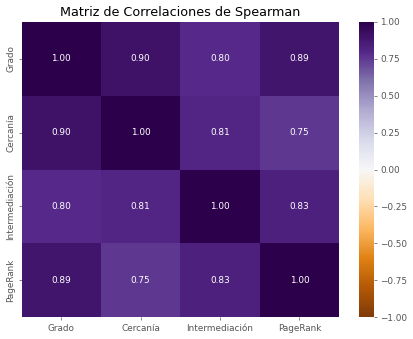

In [ ]:
# Calcular las medidas de centralidad
grado = dict(nx.degree(G))
cercania = nx.closeness_centrality(G)
intermediacion = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

# Crear un DataFrame para almacenar las medidas de centralidad
df_centralidad = pandas.DataFrame({
    'Grado': pandas.Series(grado),
    'Cercanía': pandas.Series(cercania),
    'Intermediación': pandas.Series(intermediacion),
    'PageRank': pandas.Series(pagerank)
})

# Calcular el coeficiente de correlación de Spearman
correlacion_spearman = df_centralidad.corr(method='spearman')

# Visualizar la matriz de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_spearman, annot=True, cmap="PuOr", fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlaciones de Spearman')
plt.show()

El resultado de la matriz de correlaciones de Spearman proporciona información sobre la relación entre las diferentes medidas de centralidad en tu red. Aquí hay algunos puntos clave para interpretar la matriz de correlaciones:

  Rango de Correlación (-1 a 1): La correlación de Spearman produce valores en el rango de -1 a 1. Un valor de 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica ninguna correlación.

  Fuerza y Dirección de la Correlación:
        Un valor cercano a 1 entre dos medidas de centralidad significa que hay una fuerte correlación positiva, lo que sugiere que a medida que una medida aumenta, la otra también tiende a aumentar.
        Un valor cercano a -1 indica una fuerte correlación negativa, lo que sugiere que a medida que una medida aumenta, la otra tiende a disminuir.
        Un valor cercano a 0 indica una correlación débil o nula.

  Interpretación Específica:
        Grado y PageRank: En redes, el grado y el PageRank a menudo están correlacionados positivamente, ya que los nodos con más conexiones (mayor grado) suelen recibir más "votos" en el algoritmo PageRank.
        Intermediación y Cercanía: Podría haber una correlación negativa entre intermediación y cercanía, ya que los nodos que son intermediarios importantes a menudo tienen una cercanía más baja y viceversa.

  Significancia Estadística (p-value): Cada celda en la matriz de correlaciones generalmente se acompaña de un valor p, que indica la significancia estadística de la correlación. Un valor p < 0.05 generalmente se considera significativo.

# Interpretación de resultados

algo asi:

La dispersión de influencia calculada para los nodos principales revela información importante sobre cómo se propaga la influencia en la red de interacciones entre las cebras de Grévy en Kenia. Para cada medida de centralidad (grado, cercanía, intermediación y PageRank), se evaluó cómo la influencia se disemina a través de los vecinos inmediatos de los nodos más centrales. Los resultados indican cómo la presencia o conexión de nodos clave afecta la estructura local de la red.

Al aplicar el coeficiente de correlación de Spearman a las clasificaciones obtenidas mediante diferentes medidas de centralidad, se analiza la consistencia entre estas medidas. Un coeficiente alto y significativo sugiere una fuerte concordancia entre las clasificaciones, lo que indica que las diferentes medidas identifican nodos similares como centrales en la red. Este análisis de correlación aporta información valiosa sobre la robustez y la fiabilidad de las medidas de centralidad utilizadas, proporcionando una visión más completa del papel de cada nodo en la red de interacciones entre las cebras de Grévy.

listop *redactar los textos escritos por chat gpt, interpretar lo del spearman

# Bibliografía

1. Siva R Sundaresan, Ilya R Fischhoff, Jonathan Dushoff, and Daniel I Rubenstein. Network metrics reveal differences in social organization between two fission–fusion species, Grevy's zebra and onager. Oecologia, 151(1):140–149, 2007.
2. http://konect.cc/networks/moreno_zebra/
3. Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.